<h1 style="font-family: Arial; font-size:4em;color:blue;">A Guide to Getting Data from the Canada Deployment Database:</h1>
    
    

<p style="font-family: Arial; font-size:1.5em;color:black;">To get started, you need to know how to run a box and use plot tools:</p>
<p style="font-family: Arial; font-size:1em;color:red;">1. HOW TO RUN A BOX: First, click on the input box you want to run, then press the "▶ Run" button on the dashboard above that looks like this: </p>
<img src="https://problemsolvingwithpython.com/04-Jupyter-Notebooks/images/run_cell.png">
<p style="font-family: Arial; font-size:1em;color:red;">2. HOW USE THE PLOT TOOLS BELOW GRAPHS: </p>
<img src="https://i.imgur.com/V2KJik9.png">

<h2 style="font-family: Arial; font-size:3em;color:black;">1. Query Box:</h2>
<p style="font-family: Arial; font-size:1em;color:black;">Please run the box below⇊ by clicking the box, then clicking run ▶(button on the menu). Scroll down ⇩ to fill out the 4 query parameters. Then, then follow instructions from there to continue.</p>
<p style="font-family: Helvetica Bold; font-size:1.5em;color:red;">▶ Run the box below <br>⇊ Then PLEASE SCROLL DOWN TO FILL OUT THE QUERY FORM! </p>

In [162]:
#Please click on this box, and then click run ▶. SCROLL DOWN ⇩ to fill out the query parameters.

#DO NOT TOUCH BELOW.

import ipywidgets 
import pandas as pd
import datetime

current_timezone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
print('Hello. You are currently in the '+str(current_timezone)+' timezone. Please answer the questions below.\n')

q_device=widgets.RadioButtons(
    options=['310043000a47373336373936' , '250046000a47373336373936'],
    disabled=False
)
print ('1. Which device are you querying for?')
display(q_device)


start_date = datetime.datetime(2019, 7, 23, 0, 0)
end_date = datetime.datetime.now()

dates = pd.date_range(start_date, end_date, freq='T')

options = [(date.strftime('%m/%d/%Y %H:%M'), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    orientation='horizontal',
    layout={'width': '600px'}
)

print ('2. Pick a datetime range by moving the two sliders (Timezone: '+str(current_timezone)+'): ')


def print_date_range(date_range):
    print('You selected the range  '+ str(date_range[0])+' — '+str(date_range[1]))

w_interact = widgets.interact(
    print_date_range,
    date_range=selection_range_slider,
    );

q_hotspots=widgets.RadioButtons(
    options=['yes' , 'no'],
    disabled=False,
    value='no'
)
print ('3. Are you querying for hotspots?')
display(q_hotspots)

q_PM= widgets.IntSlider(min=0, max=200, step=1, value=100)
print ('4. (Only for hotspots) What is the minimum PM2.5 (ug/m4) that you consider a hotspot:')
display(q_PM)

print ('Done. Now, we continue down ⇩ and query. To query, click the box below ⇩ and click run ▶.')


Hello. You are currently in the EDT timezone. Please answer the questions below.

1. Which device are you querying for?


RadioButtons(options=('310043000a47373336373936', '250046000a47373336373936'), value='310043000a47373336373936…

2. Pick a datetime range by moving the two sliders (Timezone: EDT): 


interactive(children=(SelectionRangeSlider(description='date_range', index=(0, 19424), layout=Layout(width='60…

3. Are you querying for hotspots?


RadioButtons(index=1, options=('yes', 'no'), value='no')

4. (Only for hotspots) What is the minimum PM2.5 (ug/m4) that you consider a hotspot:


IntSlider(value=100, max=200)

Done. Now, we continue down ⇩ and query. To query, click the box below ⇩ and click run ▶.


In [163]:
#Click this box, then click run (▶ in the menu) to query for the data. ⇩

#DO NOT TOUCH.

import requests
import datetime
import pandas as pd 
import time 
import pytz

deviceID = q_device.value

first_time = selection_range_slider.value[0]
mintime = str(int(first_time.replace(tzinfo=current_timezone).timestamp()))

second_time = selection_range_slider.value[1]
maxtime = str(int(second_time.replace(tzinfo=current_timezone).timestamp()))

PM= str(q_PM.value)

if q_hotspots.value=='yes':
    GSI='deviceID-PM2.5-index'
elif q_hotspots.value=='no':
    GSI='false'
        
table = 'canada-data'
URL="https://znd63koi6g.execute-api.us-east-1.amazonaws.com/beta/data?deviceID="+deviceID+"&table="+table+"&min="+mintime+"&max="+maxtime+"&GSI="+GSI+"&PM="+PM

print (URL)
print ('\nThis is your API endpoint. Please continue ⇩ to the next box titled "2. Getting data from the database:" below to pull the data from this endpoint.')
print ('\n⇩\n⇩\n⇩\n')


https://znd63koi6g.execute-api.us-east-1.amazonaws.com/beta/data?deviceID=310043000a47373336373936&table=canada-data&min=1564559040&max=1564595880&GSI=false&PM=100

This is your API endpoint. Please continue ⇩ to the next box titled "2. Getting data from the database:" below to pull the data from this endpoint.

⇩
⇩
⇩



<h2 style="font-family: Arial; font-size:3em;color:black;">2. Getting data from the database:</h2>
<p style="font-family: Arial; font-size:1em;color:black;">After you have run one of the two query boxes above, run the box below by clicking the box below and clicking run (button on the menu). If you get a success, you can move on.</p>

<p style="font-family: Arial; font-size:1em;color:red;">Warning: This could take some time. Wait for a message to appear.</p>

In [164]:
#If you have run either 1a or 1b, go ahead and press the run button for this box. If you get a success, you can move on.


#DO NOT TOUCH BELOW
#use request library to get from API that queries the dyanmodb
response = requests.get(URL)
status = str(response.status_code)[0]

#This checks the status code for a good status 200 or 300. If you get an error, something is wrong.
if status=="2" or status=="3":
    json = response.json()
    
    #load in the json response body, create a new dataframe
    new_df = pd.DataFrame.from_records(json)
    #convert datetime to EST and add an 'on' column
    new_df = new_df[(new_df['datetime'] >= int(mintime)) & (new_df['datetime'] <= int(maxtime))]
    new_df['new_datetime'] = pd.to_datetime(new_df['datetime'], unit='s').dt.tz_localize('GMT').dt.tz_convert(current_timezone)#.dt.tz_localize(None)
    new_df = new_df.set_index('new_datetime')
    new_df['On']=1
    if new_df.empty:
        print ('Your query did not have any results.')
    else:
        print('Success! You can move down⇩. You used the API to get data from the database! This is a brief overview of the data:' )
    cols=['datetime','deviceID','latitude', 'longitude', 'PM1','PM2.5','PM10', 'humidity', 'temperature', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9','bin10', 'bin11', 'bin12', 'bin13', 'bin14',
          'bin15','sfr', 'On']
    new_df = new_df[cols]
    display(new_df.iloc[:,list(range(0,9))])
else:
    raise ValueError('Error: Check Query Parameters and try again. Either you input the parameters incorrectly or no data exists for that period. You need a Success before moving on to the next box.')

Success! You can move down⇩. You used the API to get data from the database! This is a brief overview of the data:


,datetime,deviceID,latitude,longitude,PM1,PM2.5,PM10,humidity,temperature
new_datetime,,,,,,,,,
2019-07-31 03:44:09-04:00,1564559049,310043000a47373336373936,49.743481,-114.872345,2.10,4.37,9.44,66.2,12.8
2019-07-31 03:44:19-04:00,1564559059,310043000a47373336373936,49.743481,-114.872345,2.91,4.30,4.83,66.3,12.8
2019-07-31 03:44:29-04:00,1564559069,310043000a47373336373936,49.743481,-114.872345,2.21,3.64,4.24,66.3,12.8
2019-07-31 03:44:39-04:00,1564559079,310043000a47373336373936,49.743481,-114.872345,1.27,2.03,2.14,66.4,12.7
2019-07-31 03:44:49-04:00,1564559089,310043000a47373336373936,49.743481,-114.872345,1.27,2.08,2.58,66.3,12.7
2019-07-31 03:44:59-04:00,1564559099,310043000a47373336373936,49.743481,-114.872345,1.05,2.02,4.12,66.2,12.7
2019-07-31 03:45:09-04:00,1564559109,310043000a47373336373936,49.743481,-114.872345,2.00,2.66,2.68,66.3,12.7
2019-07-31 03:45:19-04:00,1564559119,310043000a47373336373936,49.743481,-114.872345,3.63,4.79,4.81,66.4,12.7
2019-07-31 03:45:29-04:00,1564559129,310043000a47373336373936,49.743481,-114.872345,1.17,1.64,1.65,66.3,12.8


<h2 style="font-family: Arial; font-size:3em;color:black;">3. Plots of PM1, PM2.5, and PM10:</h2>

<p style="font-family: Arial; font-size:1em;color:black;">If you got a success message from the previous box, go ahead and run the box below, which will plot PM2.5, PM1, and PM10 for the device you selected over the time you selected. You can use the tools to zoom into the plots and pan.</p>

<IPython.core.display.Javascript object>


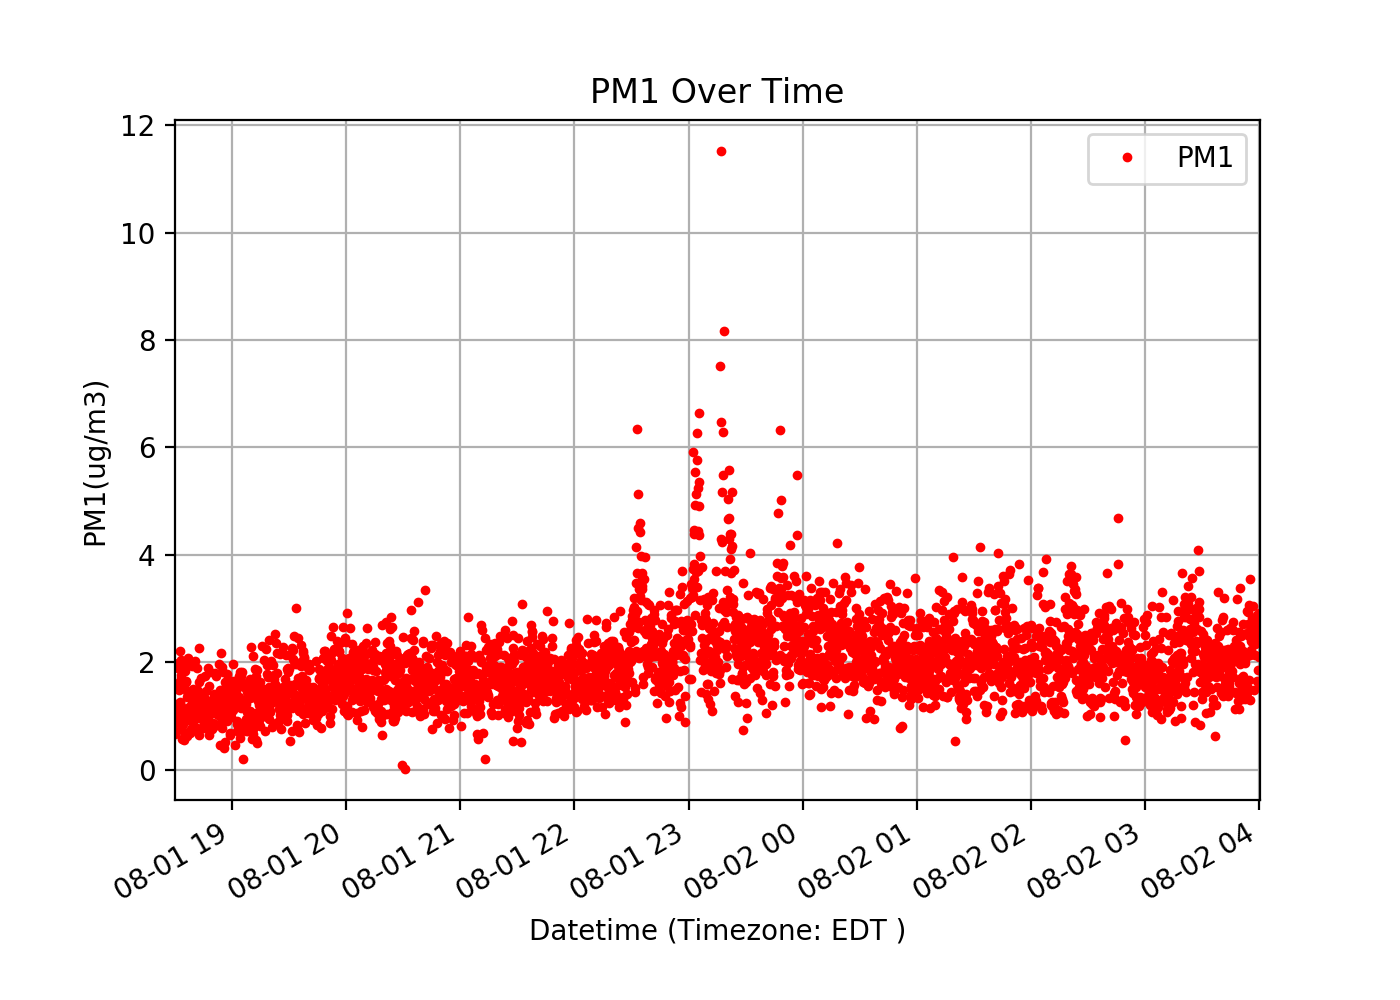

<IPython.core.display.Javascript object>


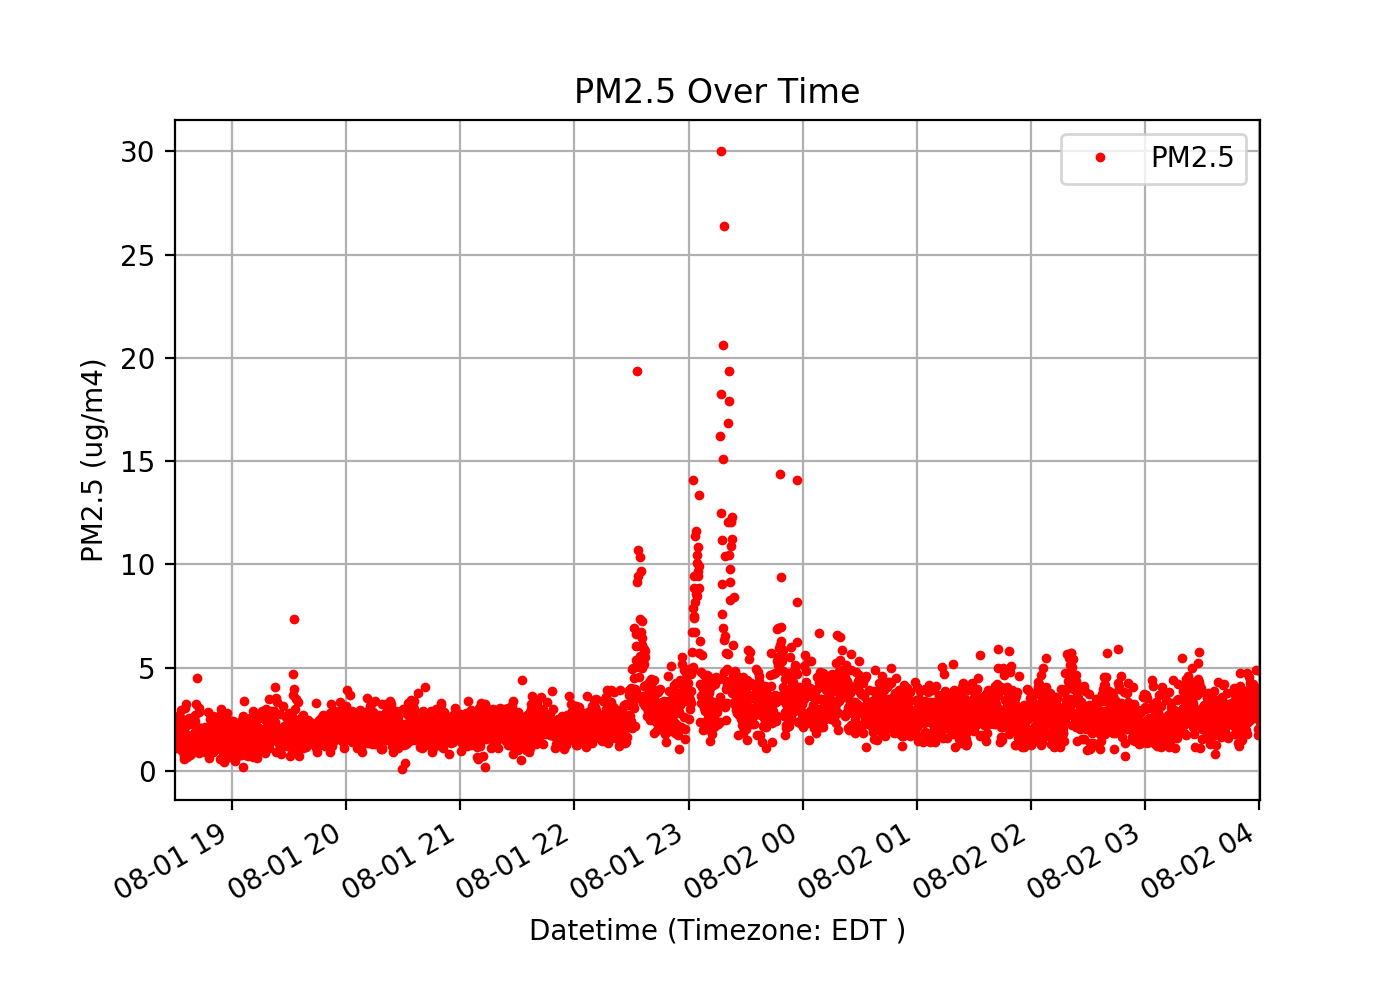

<IPython.core.display.Javascript object>


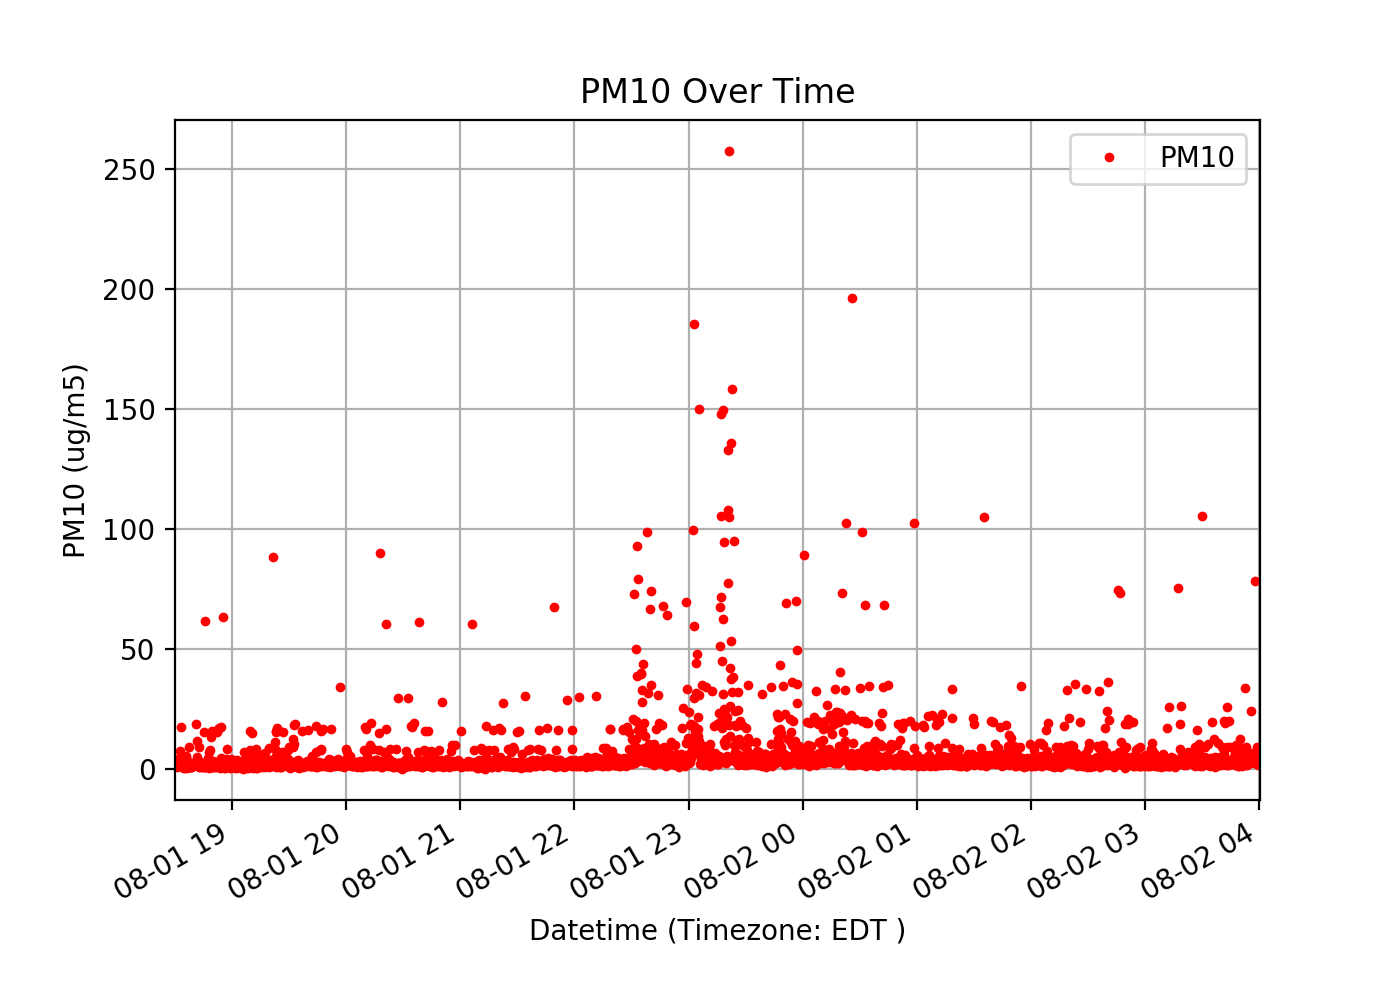

Text(0.5, 0, 'Datetime (Timezone: EDT )')

In [139]:
#Click on this box, then click run. You can use the tools to zoom into the plots and pan.

%matplotlib notebook

#plot PM1
PM1=new_df.plot(y='PM1',title='PM1 Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
PM1.set_ylabel('PM1(ug/m3)')
PM1.set_xlabel('Datetime (Timezone: '+str(current_timezone)+' )')

#plot PM2.5
PM2_5=new_df.plot(y='PM2.5',title='PM2.5 Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
PM2_5.set_ylabel('PM2.5 (ug/m4)')
PM2_5.set_xlabel('Datetime (Timezone: '+str(current_timezone)+' )')

#plot PM10
PM10=new_df.plot(y='PM10',title='PM10 Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
PM10.set_ylabel('PM10 (ug/m5)')
PM10.set_xlabel('Datetime (Timezone: '+str(current_timezone)+' )')

<h2 style="font-family: Arial; font-size:3em;color:black;">4. Map of the data you queried:</h2>

<p style="font-family: Arial; font-size:1em;color:black;">This will plot the data that you searched for on an interactive map. Click the run button on the box below. Use the zoom in and out buttons to explore.</p>

In [89]:
#Click On this Box and then Click Run to See a Map of the Points you Queried for.

#Do Not Touch Below.
#Plotting all UNIQUE points (lat, long) on the map
import folium

start_point=(49.743488, -114.87236)

#key="sk.eyJ1IjoiYW5uaWUxYmx1ZSIsImEiOiJjand0b29lMWMwMmpjNDNscnBldnJ2dGJ2In0.z9120aEgKyWaBANXqilRag"
my_map = folium.Map(location=start_point, zoom_start=12,tiles='Stamen Terrain')
#API_key=key,tiles='Mapbox Bright')

points=[]
for index, row in new_df.iterrows():
    point=(row['latitude'], row['longitude'])
    if point not in points:
        new_point=(row['latitude'], row['longitude'])
        points.append(new_point)

for each in points:
    folium.CircleMarker(location=each, popup='Point:'+ str(each), color='blue', fill=True, fill_color='blue',radius=10).add_to(my_map)
my_map.add_child(folium.LatLngPopup())
my_map

<h2 style="font-family: Arial; font-size:3em;color:black;">5. Plot when the device you selected has been ON for the time range you selected:</h2>

<p style="font-family: Arial; font-size:1em;color:black;">Click the run button on the box below to see the plot. You can use the tools to zoom into the plots and pan.</p>

<IPython.core.display.Javascript object>


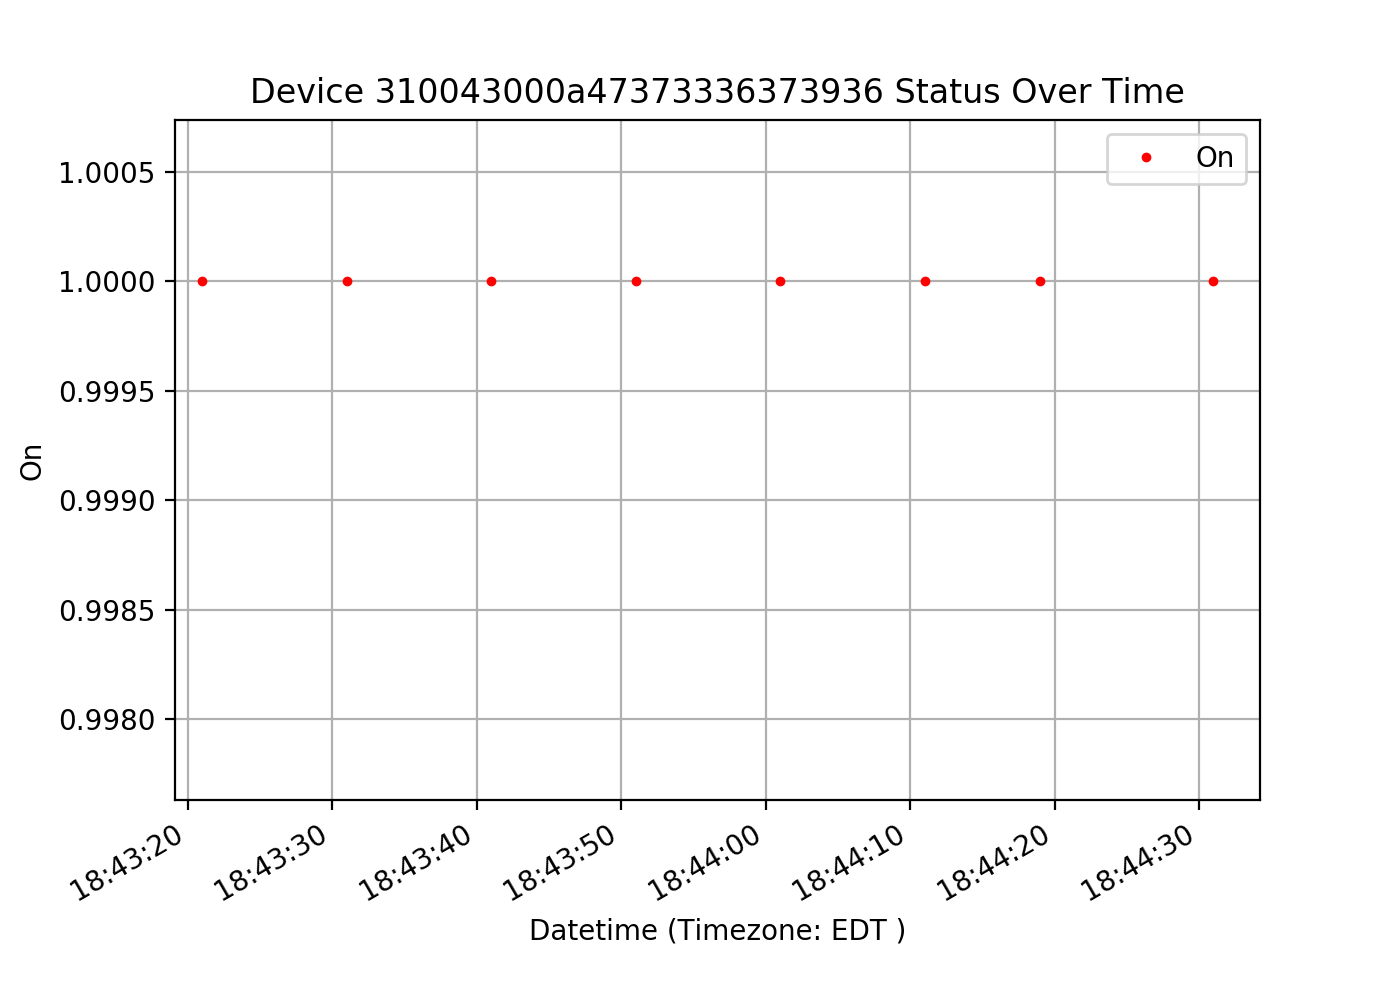

In [130]:
#Click on this box and then click run to see a plot of when your device has been on/transmitting data.
#You can use the tools to zoom into the plots and pan.

%matplotlib notebook
import matplotlib

if deviceID=='310043000a47373336373936':
    #create a new dataframe for canada device 1 
    device_1=new_df.loc[new_df['deviceID']=='310043000a47373336373936']

    #plot onoff for device 1 
    onoff=device_1.plot(y='On',title='Device '+deviceID+' Status Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
    onoff.set_ylabel('On')
    onoff.set_xlabel('Datetime (Timezone: '+str(current_timezone)+' )')
    matplotlib.pyplot.show()
else:
    #create a new dataframe for canada device 2
    device_2=new_df.loc[new_df['deviceID']=='250046000a47373336373936']

    #plot onoff for device 2
    onoff=device_2.plot(y='On',title='Device '+deviceID+' Status Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
    onoff.set_ylabel('On')
    onoff.set_xlabel('Datetime (Timezone: '+str(current_timezone)+' )')
    matplotlib.pyplot.show()

<h2 style="font-family: Arial; font-size:3em;color:black;">6. Hotspot visualization:</h2>

<p style="font-family: Arial; font-size:1em;color:black;">If you queried for hotspots, click the run button on the box below to see the map. You can use the tools to zoom into the map.</p>

In [111]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint


if GSI=='false':
    print ('You did not query for hotspots.')
else: 
    hotspots = new_df

    #this is for finding the centermost_point that a measurement exists at
    def get_centermost_point(cluster):
        centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
        centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
        return tuple(centermost_point)

    coords = hotspots.loc[:,['latitude','longitude']].values

    kms_per_radian = 6371.0088
    epsilon = 0.1 / kms_per_radian
    db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))-(1 if -1 in set(cluster_labels) else 0)
    outliers = coords[cluster_labels == -1]

    clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
    #outliers = coords[cluster_labels == -1]
    #print('Number of clusters: {}'.format(num_clusters))

    centermost_points = clusters.map(get_centermost_point)
    #centermost_points = clusters.map(get_centroid)

    start_point=centermost_points[0]
    
    #warning: this map is misleading because it only plots the unique hotspot points, therefore there are many red spots 
    #missing simply because there are multiple hotspot measurements made in the same exact longitude and latitude point
    import folium

    #key="sk.eyJ1IjoiYW5uaWUxYmx1ZSIsImEiOiJjand0b29lMWMwMmpjNDNscnBldnJ2dGJ2In0.z9120aEgKyWaBANXqilRag"
    new_map = folium.Map(location=start_point, zoom_start=14)
    #API_key=key,tiles='Mapbox Bright')
    points=[]
    #add a markers
    for index, row in hotspots.iterrows():
        point=(row['latitude'], row['longitude'])
        if point not in points:
            new_point=(row['latitude'], row['longitude'])
            points.append(new_point)      
    for rep in centermost_points:
        folium.CircleMarker(location=rep, popup='Point:'+str(each), color='blue', fill=True, fill_color='blue',radius=20).add_to(new_map)
    for each in points:
        folium.CircleMarker(location=each, popup='Point:'+str(each), color='red', fill=True, fill_color='red',radius=10).add_to(new_map)
        new_map.add_child(folium.LatLngPopup())
  
new_map

<p style="font-family: Arial; font-size:1em;color:black;">Red points are hotspots. Blue points are mega-hotspots where at there are at least 10 hotspots clustered within 100 meters</p>